In [125]:
import pandas as pd

train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [126]:
train_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [127]:
train_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
2754,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
2755,2022-04-03,45859.128906,47313.476563,45634.105469,46453.566406,46453.566406,25414397610
2756,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455


In [128]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455
1,2022-04-05,46624.507813,47106.140625,45544.808594,45555.992188,45555.992188,29640604055
2,2022-04-06,45544.355469,45544.355469,43193.953125,43206.738281,43206.738281,39393395788
3,2022-04-07,43207.500000,43860.699219,42899.906250,43503.847656,43503.847656,26101973106
4,2022-04-08,43505.136719,43903.019531,42183.289063,42287.664063,42287.664063,27215995394


In [129]:
test_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
727,2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,20050941373
728,2024-04-01,71333.484375,71342.093750,68110.695313,69702.148438,69702.148438,34873527352
729,2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,50705240709
730,2024-04-03,65446.671875,66914.320313,64559.898438,65980.812500,65980.812500,34488018367
731,2024-04-04,65990.351563,66334.640625,65149.296875,66125.828125,66125.828125,31067602944


In [130]:
del train_data["Adj Close"]
del test_data["Adj Close"]

In [131]:
print(train_data.shape)
print(test_data.shape)

(2757, 6)
(732, 6)


In [132]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2757 non-null   object 
 1   Open    2757 non-null   float64
 2   High    2757 non-null   float64
 3   Low     2757 non-null   float64
 4   Close   2757 non-null   float64
 5   Volume  2757 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 129.4+ KB


In [133]:
train_data.describe()

,Open,High,Low,Close,Volume
count,2757.000000,2757.000000,2757.000000,2757.000000,2.757000e+03
mean,11793.649414,12108.273090,11449.762658,11808.705328,1.490242e+10
std,16425.489014,16861.668068,15930.491698,16433.500367,1.993605e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,609.870972,612.567993,607.039001,609.874023,8.177350e+07
50%,6386.129883,6506.009766,6298.240234,6388.439941,5.262869e+09
75%,10796.930664,11052.299805,10503.504883,10796.951172,2.515405e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


In [134]:
# check for null values
print(train_data.isnull().sum())

# check for NA values
print(train_data.isna().any())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool


In [135]:
# starting & ending date
print("starting date of train data: ", train_data.iloc[0, 0])  
print("ending date of train data: ", train_data.iloc[-1, 0])

print("starting date of test data: ", test_data.iloc[0, 0])
print("ending date of test data: ", test_data.iloc[-1, 0])
print()

# print no days
print("no of days in train data: ", train_data.shape[0])
print("no of days in test data: ", test_data.shape[0])


starting date of train data:  2014-09-17
ending date of train data:  2022-04-04
starting date of test data:  2022-04-04
ending date of test data:  2024-04-04

no of days in train data:  2757
no of days in test data:  732


In [136]:
train_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [137]:
# convert date to datetime
train_data["Date"] = pd.to_datetime(train_data["Date"], format="%Y-%m-%d")
first_date = train_data.iloc[0, 0]
print("first date: ", first_date)
print("year: ", first_date.year)
print("month: ", first_date.month)
print("day: ", first_date.day)
print("day of week: ", first_date.dayofweek)
print("day of year: ", first_date.dayofyear)
print("week of year: ", first_date.weekofyear)
print("quarter: ", first_date.quarter)
print("name of day: ", first_date.day_name())

# same for test data
test_data["Date"] = pd.to_datetime(test_data["Date"], format="%Y-%m-%d")

first date:  2014-09-17 00:00:00
year:  2014
month:  9
day:  17
day of week:  2
day of year:  260
week of year:  38
quarter:  3
name of day:  Wednesday


In [138]:
# analysis of year 2020
y_2020 = train_data.loc[(train_data["Date"] >= "2020-01-01") & (train_data["Date"] <= "2020-12-31")]
y_2020


,Date,Open,High,Low,Close,Volume
1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095
...,...,...,...,...,...,...
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,66479895605
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,49056742893
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,45265946774
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,51287442704


In [139]:

monthvise = y_2020.groupby(y_2020["Date"].dt.month)[["Open", "Close"]].mean()
monthvise["Low"] = y_2020.groupby(y_2020["Date"].dt.month)[["Low"]].min()
monthvise["High"] = y_2020.groupby(y_2020["Date"].dt.month)[["High"]].max()
monthvise["Volume"] = y_2020.groupby(y_2020["Date"].dt.month)[["Volume"]].sum()
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthvise.index = month_names
monthvise

,Open,Close,Low,High,Volume
Jan,8318.949597,8389.270476,6914.996094,9553.125977,852872174496
Feb,9656.215113,9630.722185,8492.932617,10457.626953,1163376492768
Mar,6943.507009,6871.016113,4106.980957,9167.695313,1290442059648
Apr,7150.611328,7224.477328,6202.373535,9440.650391,1156127164831
May,9237.761530,9263.151745,8374.323242,9996.743164,1286368141507
Jun,9499.797005,9489.227214,8975.525391,10199.565430,650913318680
Jul,9519.383852,9589.899729,8977.015625,11415.864258,545813339109
Aug,11639.097215,11652.394185,11012.415039,12359.056641,708377092130
Sep,10689.700163,10660.276856,9916.493164,12067.081055,1075949438431
Oct,11791.307491,11886.978201,10416.689453,14028.213867,1050874546086


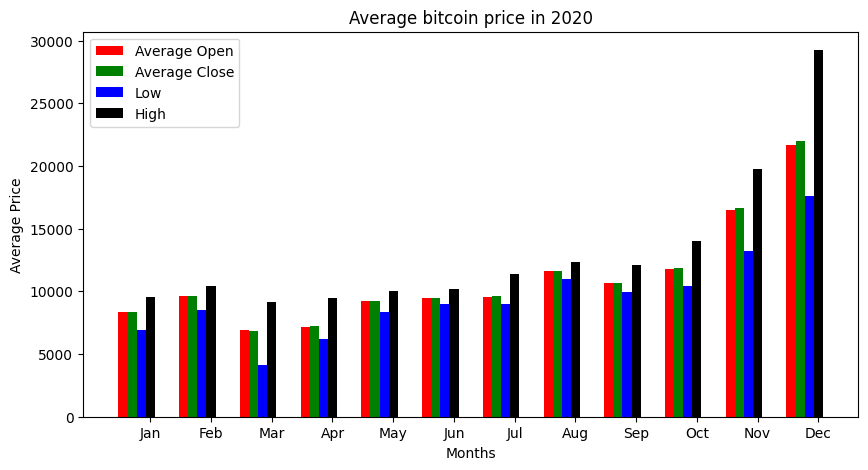

In [140]:
import matplotlib.pyplot as plt

# create a numeric index for x-axis
x = range(len(monthvise.index))

width = 0.15  # this can be adjusted
plt.figure(figsize=(10, 5))
plt.bar([i-width*3 for i in x], monthvise["Open"], color="red", label="Average Open", width=width)
plt.bar([i-width*2 for i in x], monthvise["Close"], color="green", label="Average Close", width=width)
plt.bar([i-width*1 for i in x], monthvise["Low"], color="blue", label="Low", width=width)
plt.bar([i-width*0 for i in x], monthvise["High"], color="black", label="High", width=width)
plt.xlabel("Months")
plt.ylabel("Average Price")
plt.title("Average bitcoin price in 2020")
plt.xticks(x, monthvise.index)  # set the x-ticks to be the months
plt.legend()
plt.show()

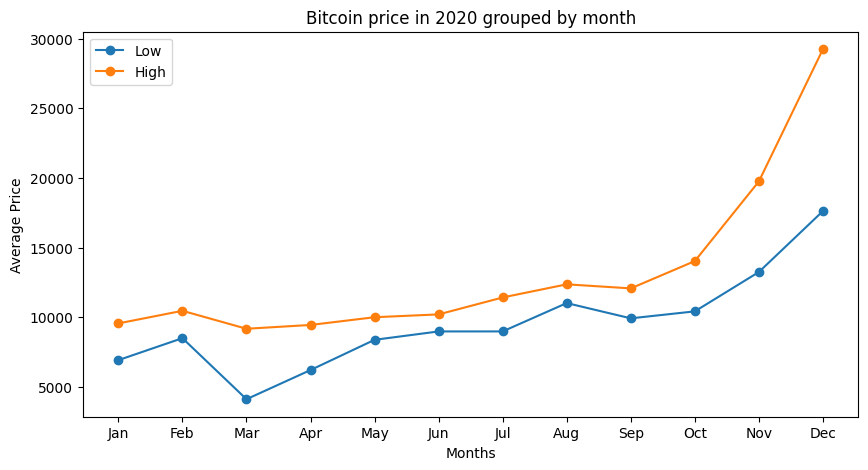

In [141]:
# plot from monthvise
plt.figure(figsize=(10, 5))
plt.plot(monthvise["Low"], label="Low", marker="o")
plt.plot(monthvise["High"], label="High", marker="o")
plt.xlabel("Months")
plt.ylabel("Average Price")
plt.title("Bitcoin price in 2020 grouped by month")
plt.xticks(x, monthvise.index)  # set the x-ticks to be the months
plt.legend()
plt.show()

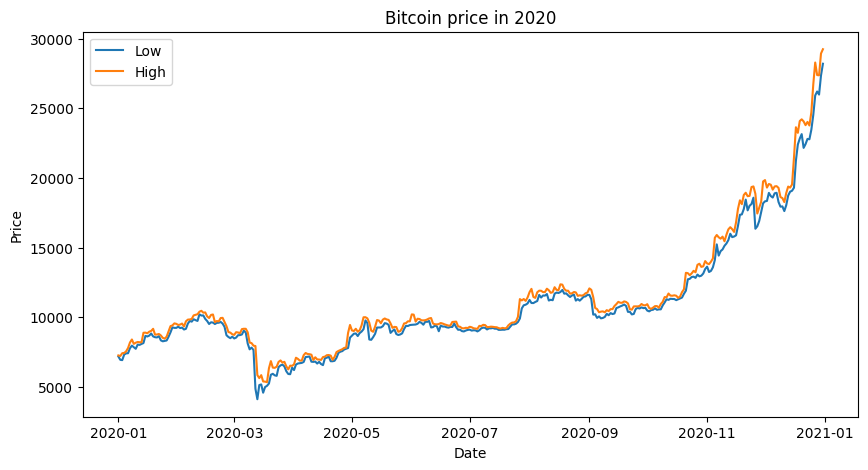

In [142]:
# plot 
plt.figure(figsize=(10, 5))
plt.plot(y_2020["Date"], y_2020["Low"], label="Low")
plt.plot(y_2020["Date"], y_2020["High"], label="High")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bitcoin price in 2020")
plt.legend()
plt.show()

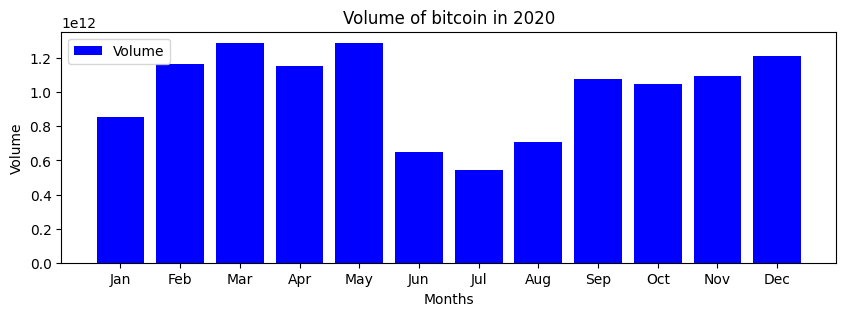

In [143]:
# plot voume
plt.figure(figsize=(10, 3))
plt.bar(x, monthvise["Volume"], color="blue", label="Volume")
plt.xlabel("Months")
plt.ylabel("Volume")
plt.title("Volume of bitcoin in 2020")
plt.xticks(x, monthvise.index)  # set the x-ticks to be the months
plt.legend()
plt.show()

In [144]:
del train_data["Volume"]
del test_data["Volume"]

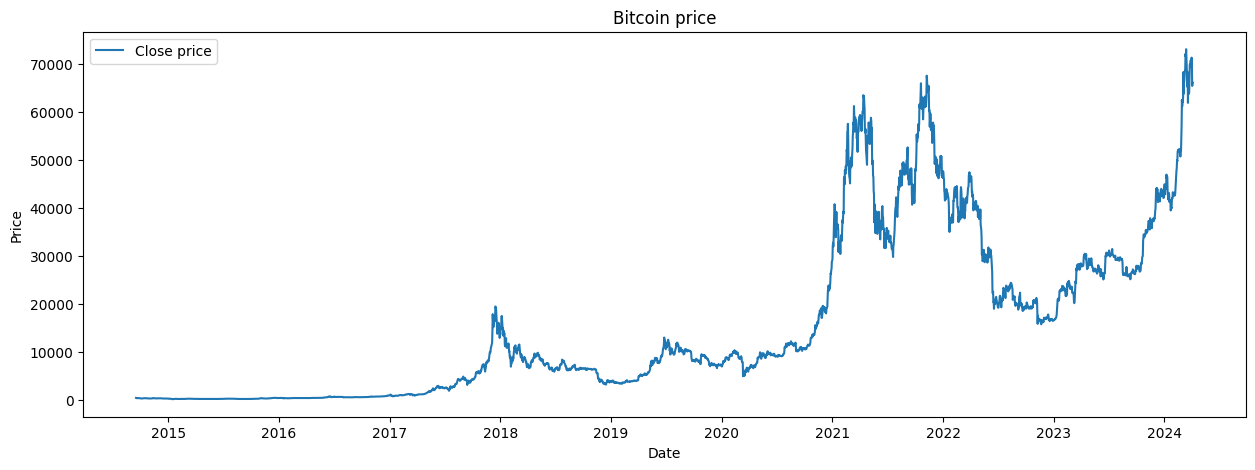

In [145]:
# plotting the whole data
data = pd.concat([train_data, test_data], axis=0)
plt.figure(figsize=(15, 5))
plt.plot(data["Date"], data["Close"], label="Close price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bitcoin price")
plt.legend()
plt.show()

In [146]:
import numpy as np

# create a function to make data for LSTM
# one data point will have n_steps data points for open, close, high, low
# size of one datapoint= n_steps*4
# n_steps=7 by default
# use numpy arrays for faster computation

def make_data_for_LSTM(df, n_steps=10):
    X, y = [], []
    for i in range(1, len(df)-n_steps):
        # get x values, which will be the difference between the current day and the previous day
        X.append(df.iloc[i:i+n_steps, 1:].values - df.iloc[i-1:i+n_steps-1, 1:].values)
        # y will be the difference between the close price of the next day and the current day
        t = df.iloc[i+n_steps, 4]-df.iloc[i+n_steps-1, 4]
        # if the value is greater than 10, then the value will be 0 - buy
        # if the value is less than 10, then the value will be 1 - sell
        # else the value will be 2 - hold
        t = 0 if t > 10 else 1 if t < -10 else 2
        y.append(t)
    x, y = np.array(X), np.array(y)
    y = y.reshape(-1, 1)
    return x, y

In [147]:
# make train data
X_train, Y_train = make_data_for_LSTM(train_data)
X_train.shape, Y_train.shape, X_train.dtype, Y_train.dtype

((2746, 10, 4), (2746, 1), dtype('float64'), dtype('int32'))

In [148]:
sample_x, sample_y = X_train[0], Y_train[0]
print("one sample data point \n")
print(train_data.columns.values)
for t, x in enumerate(sample_x):
    print(f"   {t}    {x[0]:5.1f}  {x[1]:5.1f}  {x[2]:5.1f}   {x[3]:5.1f}")
print("\ntarget -> next close price: ", sample_y)

one sample data point 

['Date' 'Open' 'High' 'Low' 'Close']
   0     -9.0  -11.3  -39.3   -32.9
   1    -32.8  -29.0  -28.6   -29.6
   2    -29.4   -4.5    5.4    14.1
   3     13.4  -10.9    3.3   -10.1
   4     -9.0   -5.5    3.9     3.3
   5      3.0   34.6   -0.9    33.6
   6     33.7   -5.4   24.9   -12.6
   7    -12.6  -12.6  -11.7   -11.6
   8    -11.7   -8.6   -9.5    -7.1
   9     -7.9   -8.3   -2.6    -4.9

target -> next close price:  [1]


In [149]:
# for test data
X_test, Y_test = make_data_for_LSTM(test_data)
X_test.shape, Y_test.shape, X_test.dtype, Y_test.dtype

((721, 10, 4), (721, 1), dtype('float64'), dtype('int32'))

In [150]:
# convert to torch tensors
import torch

X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.long)
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)

X_test.shape, Y_test.shape, X_train.shape, Y_train.shape


(torch.Size([721, 10, 4]),
 torch.Size([721, 1]),
 torch.Size([2746, 10, 4]),
 torch.Size([2746, 1]))

In [151]:
# make tensor datasets and data loaders
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

print("number of batches in train_loader: ", len(train_loader))
print("number of data points in one batch: ", train_loader.batch_size)
print("shape of one data point: ", train_loader.dataset.tensors[0][0].shape)
print("shape of one target: ", train_loader.dataset.tensors[1][0].shape)
print("total number of data points in train_loader: ", len(train_loader.dataset))
print()
print("number of batches in test_loader: ", len(test_loader))
print("number of data points in one batch: ", test_loader.batch_size)
print("shape of one data point: ", test_loader.dataset.tensors[0][0].shape)
print("shape of one target: ", test_loader.dataset.tensors[1][0].shape)
print("total number of data points in test_loader: ", len(test_loader.dataset))


number of batches in train_loader:  21
number of data points in one batch:  128
shape of one data point:  torch.Size([10, 4])
shape of one target:  torch.Size([1])
total number of data points in train_loader:  2746

number of batches in test_loader:  1
number of data points in one batch:  721
shape of one data point:  torch.Size([10, 4])
shape of one target:  torch.Size([1])
total number of data points in test_loader:  721


In [152]:
# how data is loaded for training 
for x, y in train_loader:
    print(x.shape, y.shape)
    # training here

torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])


In [153]:
t = iter(train_loader)

In [154]:
while True:
    try:
        x, _= next(t)
        print(x.shape, y.shape)
    except StopIteration:
        break

torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
torch.Size([128, 10, 4]) torch.Size([128, 1])
